<a href="https://colab.research.google.com/github/RobertoCuellar2019/tesis/blob/codigos_reconstruccion/v1_reconstruccion_no_ia4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VERSIÓN 1.0 CÓDIGO TESIS DE PREGRADO**

RECONSTRUCCIÓN DE OBJETOS 3D UTILIZANDO HOLOGRAMAS FRACCIONARES Y REDES NEURONALES PARA EL RECONOCIMIENTO DE PATRONES DE DIFRACCIÓN

ROBERTO ANTONIO CUELLAR LOZANO
UNIVERSIDAD DE PAMPLONA 
PAMPLONA- NORTE DE SANTANDER 


In [0]:
import numpy as np  # libreria de calculo numerico y arreglos
import matplotlib.pyplot as pl # libreria para visualización

In [0]:
# Parámetros del modulador y el tamaño del pixel de modulador

M = 768 # numero de pixeles del modulador
N = 768
pi = np.pi
dx = 19e-6 # tamano del modulador
LX = M*dx
LY = M*dx
x = np.linspace(-LX/2,(LX/2)-dx, M) # dominio espacial modulador
y = x
l_onda = 514e-9 # longitud de onda
k = 2*pi/l_onda # numero de onda

La función proptf realiza la transformada de fourier utilizando la función de transferencia : \
$u_{f}= F^{-1}[U_{entrada}H] $ \
Donde $U_{entrada}$ es la transformada de fourier de la imagen objeto y $H$ la función de transferencia


In [0]:
# funcion calculo de la difraccion en propagacion libre

def proptf(entrada, l_onda, z):
  M = 768
  N = 768
  dx = 19e-6
  LX = M*dx
  LY = N*dx
  pi = np.pi
  fx = np.linspace(-1/(2*dx),1/(2*dx)-1/LX, M)
  fy = fx
  FX, FY = np.meshgrid(fx, fy)
  H = np.exp(-1j*pi*l_onda*z*((FX**2)+(FY**2)))
  H = np.fft.fftshift(H)
  U1 = np.fft.fft2(np.fft.fftshift(entrada))
  U2 = H*U1
  salida =np.fft.fftshift(np.fft.ifft2(U2))
    #pl.imshow(abs(np.fft.fftshift(salida))**2)
    #pl.show()
  return (salida)

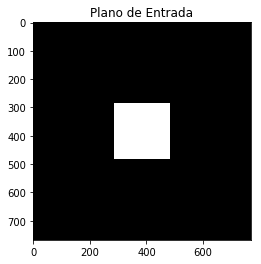

In [5]:
# Parámetros de la ventana de senal de prueba, en este caso un cuadrado 
w = 100*dx
z = 0.8
xx = np.where(abs(x)<= w , 1, 0) # funcion rectangulo de ancho 2w
X , Y = np.meshgrid(xx ,xx) # arreglo bidimensional 
entrada = X*Y #funcion rectangulo 
pl.imshow(entrada, cmap ='gray')
pl.title('Plano de Entrada')
pl.show()



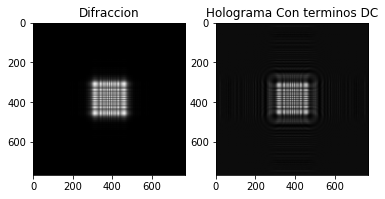

In [6]:
# visualizacion de la difraccion de fresnel del objeto de entrada y el respectivo holograma

difraccion = proptf(entrada, l_onda, z)
ref = np.exp(1j*k*z)*np.ones([M, M], dtype = int) # onda de referencia
holograma = (ref+difraccion)**2 # holograma con terminos de DC

pl.subplot(1,2,1)
pl.imshow(abs((difraccion)**2), cmap = 'gray')
pl.title('Difraccion')
pl.subplot(1,2,2)
pl.imshow(abs(holograma)**2, cmap = 'gray')
pl.title('Holograma Con terminos DC')
pl.show()



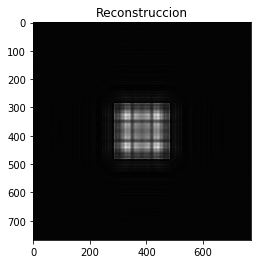

In [7]:
### visualizacion de la reconstruccion 
holoint = abs(holograma**2)
holoint = holoint/np.max(holoint)# se normaliza el hologama
holorecons = proptf(ref*holoint, l_onda, z)

pl.imshow(abs(holorecons)**2, cmap = 'gray')
pl.title('Reconstruccion')
pl.show()

In [0]:
from matplotlib.patches import Polygon # importante para realizar circulos 

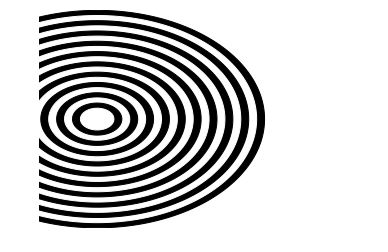

In [73]:
n_anillos = 20
rmax = 2
rmin = 0.2
centrox = -1.3 # centro en la coordenada en x de los anillos
centroy = 0 # centro en la coordenada en y de los anillos
ratio = (rmax-rmin)/n_anillos
vec_rad = np.linspace(rmin,rmax,n_anillos)
theta2 = np.linspace(0, 2*np.pi, 768)
col = "white"
fig, ax = pl.subplots()
for i in reversed(vec_rad): #reversed toma el vector comenzando por atras
  xa = (i * np.cos(theta2))+ centrox
  ya = (i * np.sin(theta2))+ centroy
  if col == "white":
    col = "black"
  elif col == "black":
    col = "white"
  poly = Polygon(np.column_stack([xa, ya]), color= col) # crea el circulo  
  ax.add_patch(poly)
  ax.set_xlim((-rmax, rmax))
  ax.set_ylim((-rmax, rmax))
pl.axis('off')
pl.show()

